In [51]:
import numpy
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC as SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from statsmodels.graphics.regressionplots import plot_ccpr
from appliedstats import *
from scipy.stats import binomtest
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm
import statsmodels.formula.api as smf
RANDOM_SEED = 42
np.random.rand(RANDOM_SEED)

# plot theme (customise to your liking)
husl = np.array(sns.palettes.husl_palette())
sns.set_theme("paper", "whitegrid", palette=husl, font="serif")
plt.rcParams["text.usetex"] = False

In [3]:
def load_data():
    data = np.load('image_data.npz')
    train_X = data['train_X']
    train_Y = data['train_Y']
    test_X = data['test_X']
    test_Y = data['test_Y']
    return train_X, train_Y, test_X, test_Y
train_X = load_data()[0]
train_Y = load_data()[1]
test_X = load_data()[2]
test_Y = load_data()[3]
'''
Imports and random seed, and data loading setup
'''

'\nImports and random seed, and data loading setup\n'

Question 1.a: We are given two sets of data in our file (image\_data.npz), both being a set of images of random hand drawn characters from multiple languages. The first set is training data which is comprised of a feature matrix of size (11280, 784) and a subsequent set of labels with shape (11280, 1). We also have our test data, with matrix size (1880, 784) and subsequent label size (1880, 1). In these label sets there are only 47 unique numbers (0-46), which each correspond to a different character and image in the matrices. However, the training data has about 6 times more data per unique label. It is also important to note that the maximum difference of data between two unique numbers in the test data is roughly 35, or \(~60\%\) while the training data is only roughly 60, or \(~20\%\)  (See code below). This means that certain test samples may be more accurate then others, while the training data is more balanced. We can also see in the model below that the average disparity in the test data samples per label is much higher, however this can be ignored as this is not the data we use to train our model.

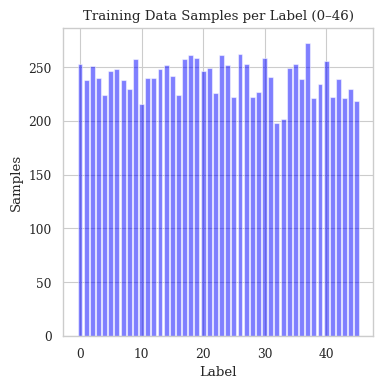

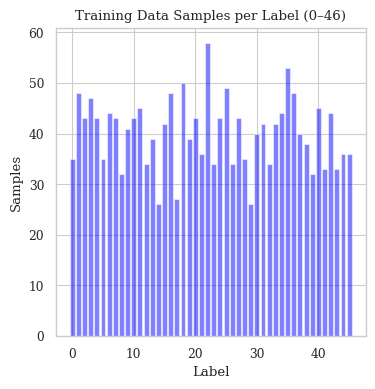

"\nBar graph plot function to show number of samples per label (SPL)\nCan change 'Training Data' to 'Test Data' if needed\nInput is Y vector\n"

In [4]:
def plot_number_of_samples_per_label(Y):
    total_samples=np.zeros(46)
    for i in range(46):
        total_samples[i]=(Y==i).sum()
    plt.figure(figsize=(4, 4))
    plt.bar(range(0,46), total_samples, color='blue', alpha =0.5)
    plt.xlabel('Label')
    plt.ylabel('Samples')
    plt.title('Training Data Samples per Label (0–46)')
    plt.show()
    return total_samples

plot_number_of_samples_per_label(train_Y)
plot_number_of_samples_per_label(test_Y)

'''
Bar graph plot function to show number of samples per label (SPL)
Can change 'Training Data' to 'Test Data' if needed
Input is Y vector
'''

Question 1.b asks to find the mean and median images for 4 randomly variables. I started off by randomly selecting labels 16, 17, 21 and 42. 
Then I extracted the data and enumerated by label, and then used numpy's np.mean and np.median commands to show the desired images. I discovered that using black and white was the clearest to visualise so chose to use the 'bone' colour. I was also interested in seeing all of the images for a specific label so also made a function to show this, simply by adding all of the desired images to a list for a specific label and then plotting them using matplotlib's image show command. This allowed me to compare the mean to all of the images, although the function is ''' out as it wasn't part of the original question.

Training Data


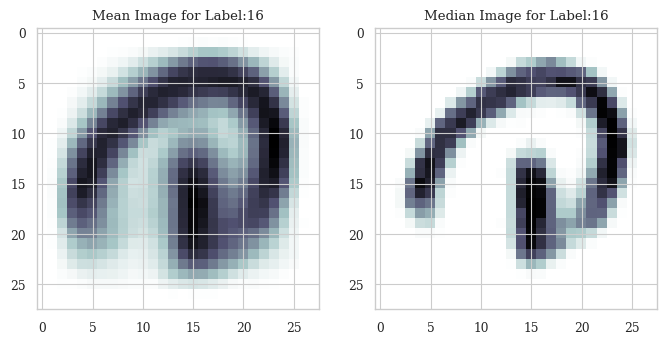

Training Data


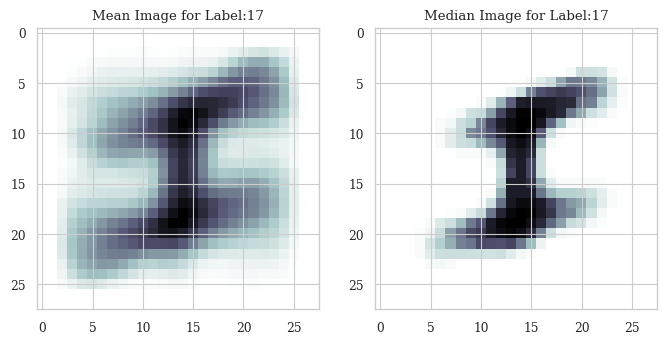

Training Data


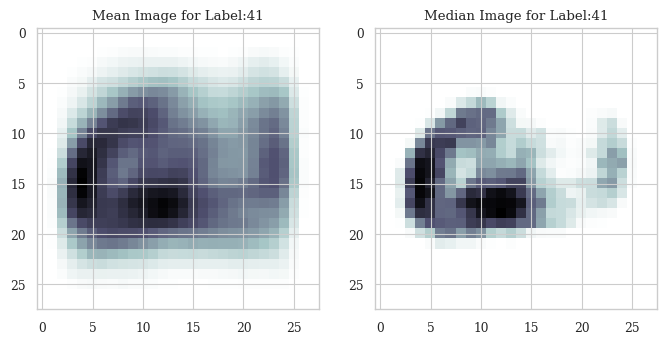

Training Data


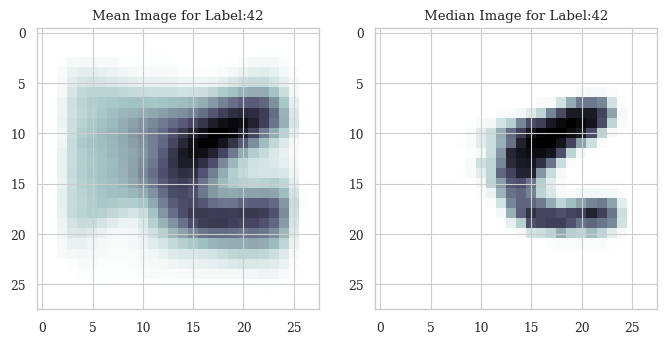

In [5]:
def mean_median_image_per_label(X, Y, label):
    img_size = int(X.shape[1] ** 0.5)
    enumerated_labels = []
    for i in range(47):
        enumerated_labels.append((i, np.where(Y == i)[0]))
    desired_label = enumerated_labels[label]
    mean_image = np.mean(X[desired_label[1]], axis=0)
    median_image = np.median(X[desired_label[1]], axis=0)
    plt.figure(figsize=(8,6)) 
    plt.subplot(1,2,1)
    plt.imshow(mean_image.reshape(img_size,img_size), cmap='bone_r')
    plt.title('Mean Image for Label:' + (str(label)))
    plt.subplot(1,2,2)
    plt.imshow(median_image.reshape(img_size,img_size), cmap='bone_r')
    plt.title('Median Image for Label:' + (str(label)))

    plt.show()
'''
Shows the mean and median image for a given label
Input is X matrix, Y vector, and label
Uses np.mean and np.median functions
'''

'''def all_images_per_label(X, Y, label):
    img_size = int(X.shape[1] ** 0.5)
    enumerated_labels = []
    for i in range(300):
        enumerated_labels.append((i, np.where(Y == i)[0]))
    desired_label = enumerated_labels[label]
    images = []
    for i in range(len(desired_label[1])):
        image = (X[desired_label[1][i]])
        images.append(image)
        plt.subplot(20,15,(i+1))
        plt.imshow(image.reshape(img_size,img_size), cmap='bone_r')
        plt.axis('off')
    plt.title(label)
    plt.show()
    return images'''
'''
Very similar functions to visualise mean and median images for input label
Input is X matrix, Y vector, and label
Uses np.mean and np.median functions (very cool)
Probably can be optimised, but works fine for now
'''

chosen_labels = [16,17,41,42]
for label in chosen_labels:
    print('Training Data')
    mean_median_image_per_label(train_X, train_Y, label)
    '''all_images_per_label(train_X, train_Y, label)'''

It can be seen that for label 16, both the median and mean images are clearly defined and very similar, meaning that all images of this data set are easily recognisable. As these are more complex images, it has more identifiable features. Label 17 also shares these features, however the mean image's top and bottom lines are longer than the median image. This means we can rely on the median image as a representation of the dataset.

Figures 21 and 42 are differing to what we saw in 16 and 17, as the median and mean images are a lot more different. As observed in 21, the median image seems to be a diagonal line, however the mean image may suggest that the symbols has some form of hook on the end in some cases. This is very hard to analyse, as it seem that in only a few cases this symbol has a hook at the end. This could be interpreted as the discrete maths negation symbol, as this could also be written as a 'negative' symbol too.
Figure 42's median image shows the letter 'c', however with the darker top half and the mean image showing a suggestion of line coming out the top, we can maybe infer this is \(\tau\) instead. We can confirm this by looking through each individual image, and while the median image has no tail, all of the other images do, confirming our assumptions. This means that we cannot rely on the median image for a good understanding of the dataset.

1.c - Linear Separability between two Classes
Through the lessons in week 3 and 4, I decided to use principle components as a way to visualise linear separability, using sklearn's PCA function. As I needed to visualise this in two dimensions, I just used the first two principle components. To achieve this, I first compacted the two classes I chose (16,17) into one image grid with a list of 0's and 1's as labels. Then I used a fit transform function to fit this image grid onto the first two components.

Train accuracy: 0.9575; Test accuracy: 1.0


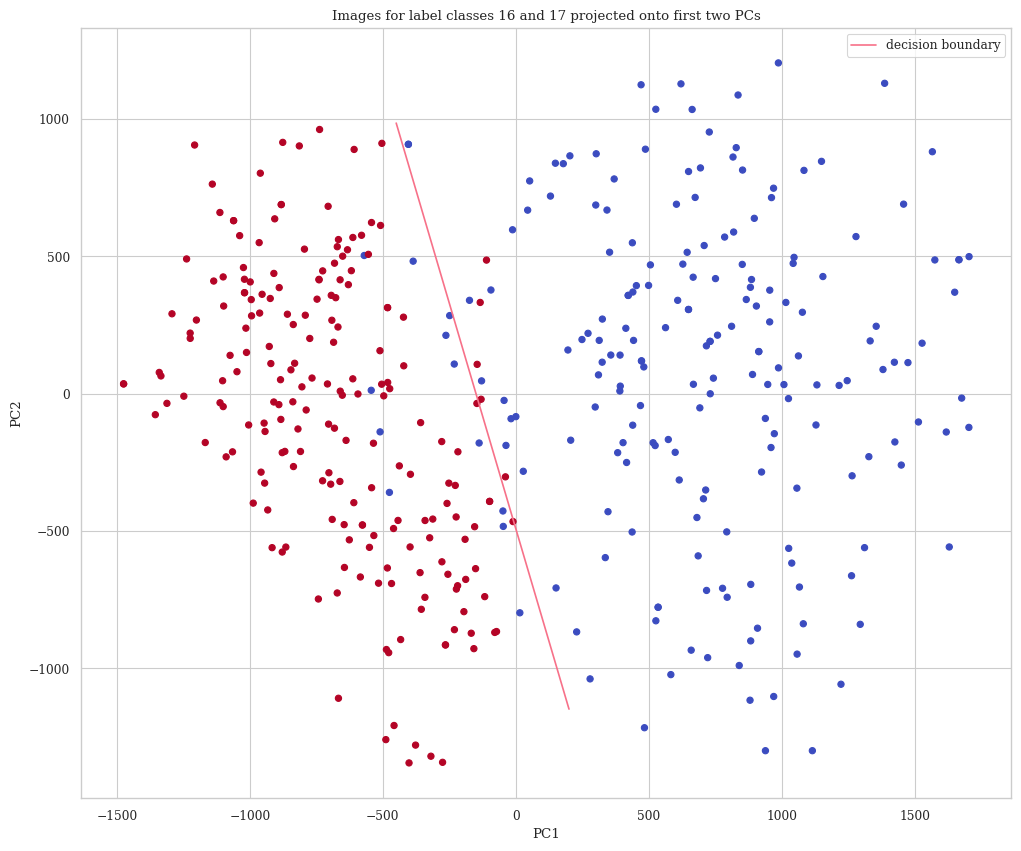

In [6]:
def plot_distribution_of_classes(X, Y, labels, test_X, test_Y):
    def enumerate_labels(label):
        enumerated_labels = []
        for i in range(47):
            enumerated_labels.append((i, np.where(Y == i)[0]))
        desired_label = enumerated_labels[label]
        return desired_label
    '''
    Enumerates all labels for easier access
    Specifically returns a desired matrix of all components when input label is given
    '''
    def find_image_grid():
        img_size = int(X.shape[1] ** 0.5)
        n_rows, n_cols = 20, 20 # Set number of rows and columns for grid, each label has ~ 200 images so 400 makes sense for 2 labels
        init_label = enumerate_labels(labels[0])[1]
        compare_label = enumerate_labels(labels[1])[1]
        init_images = X[init_label[:200]] #choose 400/2 as want 50/50 split
        compare_images = X[compare_label[:200]] #choose 400/2 again
        filtered_y = np.array([0] * 200 + [1] * 200)
        filtered_X = np.vstack((init_images, compare_images)) # set X to only the two classes we are interested in
        images_3d = filtered_X.reshape(-1, img_size, img_size)
        image_grid = images_3d.reshape(n_rows, n_cols, img_size, img_size).swapaxes(1, 2).reshape(img_size * n_rows, img_size * n_cols)
        return filtered_X, filtered_y, image_grid
    '''
    Finds a grid of combined images from two classes specified in labels
    Also returns filtered y vector for those two classes
    Input is X matrix, Y vector, and labels (list of two labels)
    '''
    images = find_image_grid()[2]

    def plot_scatter(test_X, test_Y):
        X, y = find_image_grid()[0], find_image_grid()[1]
        def find_test_data(tX, tY):
            idx_a = np.where(tY == labels[0])[0][:10]
            idx_b = np.where(tY == labels[1])[0][:10]
            init_images = tX[idx_a]
            compare_images = tX[idx_b]
            X = np.vstack((init_images, compare_images))
            y = np.array([0]*len(idx_a) + [1]*len(idx_b))
            return X, y
        
        filtered_test_X, filtered_test_Y = find_test_data(test_X, test_Y)

        pca = PCA(n_components=2) #PCA that keeps 2 critical comps for scatter plot (2D)
        X_pca = pca.fit_transform(X)
        X_test_pca = pca.transform(filtered_test_X)

        clf = SVC(C=0.1) # Fit to the training data with cross validation
        clf.fit(X_pca, y)
        y_train_pred = clf.predict(X_pca)
        y_test_pred = clf.predict(X_test_pca)
        # compute train/test confusion matrices and print corresponding classification accuracies
        cm_train = confusion_matrix(y, y_train_pred)
        cm_test = confusion_matrix(filtered_test_Y, y_test_pred)
        # calculate accuracies
        acc_train = np.trace(cm_train)/cm_train.sum()
        acc_test = np.trace(cm_test)/cm_test.sum()
        print(f"Train accuracy: {acc_train}; Test accuracy: {acc_test}")

        # get coef and inter from SVC
        coef = clf.coef_[0]
        intercept = clf.intercept_[0]

        #find decision boundary (0 = intercept + coef[0]* x[0] + coef[1]*x[1])
        x0 = np.arange(-450,250,50)
        x1 = -(intercept + coef[0] * x0) / coef[1]

        plt.figure(figsize=(12, 10))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=20)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.plot(x0,x1, label="decision boundary")
        plt.legend()
        plt.title('Images for label classes 16 and 17 projected onto first two PCs')
        plt.show()
    '''
    plots scatter of two classes projected onto first two principal components
    Uses PCA from sklearn to reduce to 2D
    '''
    plot_scatter(test_X, test_Y)

'''
Plots scatter grapg of PCA's of two classes specified in labels
Also has function to plot PCA compression rate (commented out for now)
Input is X matrix, Y vector, labels (list of two labels), test_X matrix, test_Y vector
Also uses SVC to classify and print accuracies
Determines linear decision boundary and plots it
'''

classes = [16,17]
plot_distribution_of_classes(train_X, train_Y, classes, test_X, test_Y)

I used SVC to draw this decision boundaries as I believe it to be the best way for simplification and it makes sense qualitatively too. It is interesting to see that while the test and train computed accuracies are very high, there are still plenty of outliers between the classes. This makes a lot of sense considering we are only using two principle components, but maybe in the future I need to improve my accuracy calculation.

1.d. - Comparing and Recognition
To create the subsets of images I first created the subset of my chosen class (1) using a similar function to earlier. First enumerating the labels to find a list of which images correspond to my class, then using that list to reference the matrix and find the images on that list. Since there are 238 images that correspond to my chosen class, I wrote a function randomly select 238 labels from the dataset using numpy's random choice function, and then similarly matched those to their images. Both functions produced a matrix of length 238 with vector images.
I then began trying to find the best metric to show image similarity. While I could have maybe used random forests possibly to analyse, or even maybe euclidean distance, I chose to use Pearson's Correlation Coefficient (PCC). I chose this as while looking through past course material I found it works best for images, as it analyses patterns better than the other two. As in both subsets the images aren't centred around a point, Euclidean distance often fails to show similarity between visually similar images.
I then created a function to find said PCC. As the overall goal is to create two histograms that show that images in subset 1 are more likely to be similar, I had to create a density function. First to find the PCC between any two points, python thankfully has a CorrCoeff. function, which takes two vector images and outputs a number from [0-1] where 1 is identical and 0 is opposite. Then my function iterates through two randomly chosen images in the inputted dataset and outputs their similarity. It then adds these to a list and returned an array of these similarities.

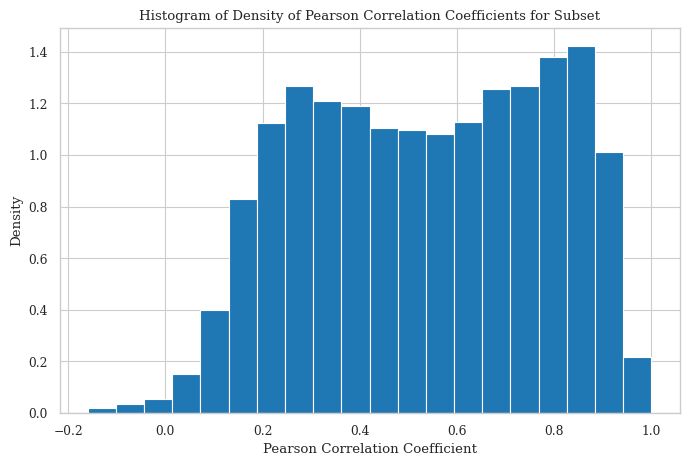

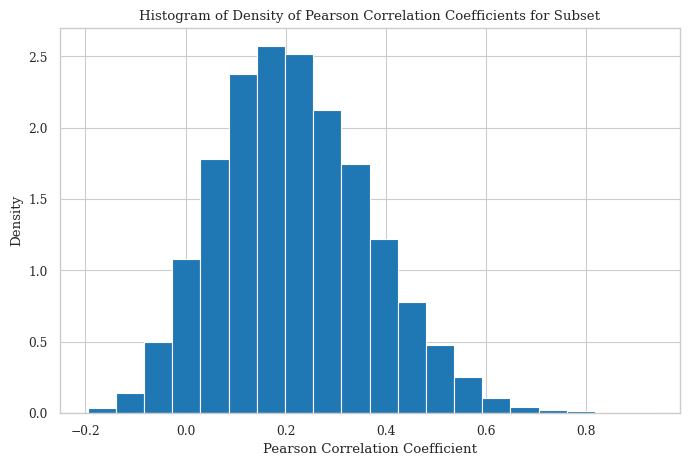

In [ ]:
def create_random_image_subset(X, no_of_images):
    no_of_images = int(no_of_images)
    random_indices = np.random.choice(X.shape[0], size=no_of_images, replace=False)
    random_images = X[random_indices]
    subset = random_images
    return subset

def create_image_subset(X, Y, label):
    def enumerate_labels(label):
        enumerated_labels = []
        for i in range(47):
            enumerated_labels.append((i, np.where(Y == i)[0]))
        desired_label = enumerated_labels[label]
        return desired_label
    '''
    Enumerates all labels for easier access
    Specifically returns a desired matrix of all components when input label is given
    '''
    desired_label = enumerate_labels(label[0])[1]
    desired_X = X[desired_label[:238]]
    subset = desired_X
    return subset

def create_PCC_array(subset):
    total = subset.shape[0]
    sim_values = []

    for _ in range(50000):
        i = np.random.randint(0, total)
        j = np.random.randint(0, total)
        while j == i:
            j = np.random.randint(0, total)
        
        x = subset[i]
        y = subset[j] 
        similarity = np.corrcoef(x, y)[0, 1] # calc correlation coefficient function
        sim_values.append(similarity)
    return np.array(sim_values)

def plot_histogram(sims):
    plt.figure(figsize=(8,5))
    plt.hist(sims, bins=20, density=True, color='tab:blue')
    plt.xlabel('Pearson Correlation Coefficient')
    plt.ylabel('Density')
    plt.title(f'Histogram of Density of Pearson Correlation Coefficients for Subset')
    plt.grid(True)
    plt.show()


chosen_label = [1]
subset_2 = create_random_image_subset(train_X, 238) # creates a subset with 238 random images
subset_1 = create_image_subset(train_X, train_Y, chosen_label) # creates a subset with class = 1 (size=238)
similarity_array1 = create_PCC_array(subset_1)
similarity_array2 = create_PCC_array(subset_2)
plot_histogram(similarity_array1)
plot_histogram(similarity_array2)

We can see by comparing these visualisations that subset 1's images are much more likely to be similar to each other, compared to subset 2. As predicted, subset 2 produces a normal shaped graph, but centred around (PCC) = 0.4 rather than what i thought would be 0.5. This is consistent no matter how many times we run it, with different sets of random images. Here, subset 1 has 2 peaks, one at 0.4 and one at 0.85, meaning that on average it is much more likely for two images here to be more similar to each other. It is interesting to note however there is a large density of PCC around 0.4, even though visually the images are similar. This is why class = 1 was chosen however, as some other classes have a produce a normal graph around 0.5. 50000 samples were run because the number of images in each subset was 238, or the max images of class 1. As 238\(^2\) is roughly 50000 rounded to the nearest ten thousand, it made sense to encompass the set as a whole by using 50000 runs. However, overall it is obvious to see that images in subset 1 are much more likely to be similar to each other.

Question 2 - Analysing and Identifying Classes
This question asks in essence to find the difference between two classes and see if we can identify them by different methods, then optimise those methods using a set of found optomiseed parameters.

In [ ]:
def extract_subset(X, Y, labels):
    def enumerate_labels(label):
        enumerated_labels = []
        for i in range(47):
            enumerated_labels.append((i, np.where(Y == i)[0]))
        desired_label = enumerated_labels[label]
        return desired_label
    def find_subset():
        init_label = enumerate_labels(labels[0])[1]
        compare_label = enumerate_labels(labels[1])[1]
        init_images = X[init_label]
        compare_images = X[compare_label]
        filtered_y = np.array([labels[0]] * len(init_label)  + [labels[1]] * len(compare_label))
        filtered_X = np.vstack((init_images, compare_images))
        return filtered_X, filtered_y
    subset = find_subset()
    return subset
'''
Extracts two classes we are interested in, returns both both the X and y's with the labels being a corresponding set of 0's and 1's
Uses numpy arrays.
'''

train_X = load_data()[0]
train_Y = load_data()[1]
test_X = load_data()[2]
test_Y = load_data()[3]
chosen_labels = [16,41]
training_set = extract_subset(train_X, train_Y, chosen_labels)
test_set = extract_subset(test_X, test_Y, chosen_labels)
X_total = np.vstack((training_set[0], test_set[0]))
y_total = np.concatenate((training_set[1], test_set[1]))
total_set = (X_total, y_total)

Best C: 1e-05
Best k = 4 Validation_ACC = 0.9811322


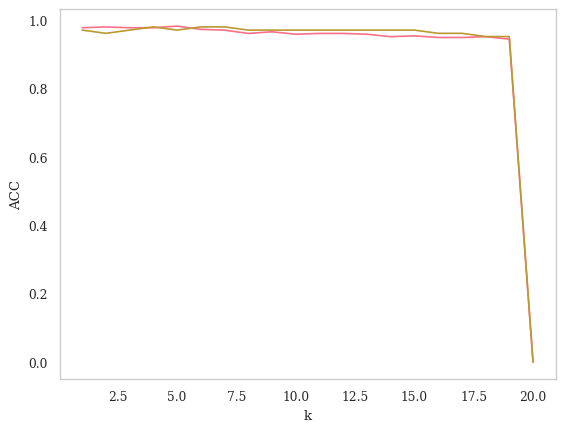

Best n_estimators = 126, CV accuracy = 0.9374
Precision of: 0.9260
Recall of: 0.9355


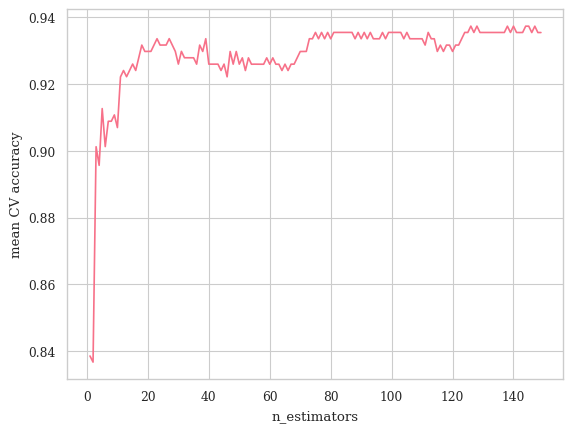

-----Unoptimised Model logreg-----
logreg train accuracy: 1.0000, test accuracy: 0.9259
-----Unoptimised Model rf-----
rf train accuracy: 1.0000, test accuracy: 0.9136
-----Unoptimised Model knn-----
knn train accuracy: 0.9753, test accuracy: 0.9630
-----Optimised Model logreg_o-----
logreg_o train accuracy: 0.9910, test accuracy: 0.9630
-----Optimised Model rf_o-----
rf_o train accuracy: 1.0000, test accuracy: 0.9259
-----Optimised Model knn_o-----
knn_o train accuracy: 1.0000, test accuracy: 0.9630


In [ ]:
def train_and_test(model, model_name, training_set, testing_set):
    train_X = training_set[0]
    train_Y = training_set[1]
    test_X = testing_set[0]
    test_Y = testing_set[1]

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=ConvergenceWarning)
        model.fit(train_X, train_Y)  # just to remove warnings to make output less clunky

    ypred_train = model.predict(train_X)
    ypred_test = model.predict(test_X)

    cm_train = confusion_matrix(train_Y, ypred_train)
    cm_test = confusion_matrix(test_Y, ypred_test)
    acc_train = np.diag(cm_train).sum()/cm_train.sum()
    acc_test = np.diag(cm_test).sum()/cm_test.sum()
    # confusion matrics for accuracy analysis, for both train and test

    print(model_name + f" train accuracy: {acc_train:.4f}, test accuracy: {acc_test:.4f}")
    return acc_train, acc_test, cm_train, cm_test

def cv_logreg(model, model_name, training_set):
    train_X = training_set[0]
    train_Y = training_set[1]

    kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

    C_choices = np.logspace(-5, 3, 9) # 9 points from 10^-3 to ^5, for C values

    model_train_acc = np.zeros((len(C_choices),5))
    model_val_acc = np.zeros((len(C_choices),5))

    for i, (train_index, test_index) in enumerate(kf.split(train_X)):
        X_train_fold = train_X[train_index]
        y_train_fold = train_Y[train_index]
        X_val_fold = train_X[test_index]
        y_val_fold = train_Y[test_index]

        for j, C in enumerate(C_choices):
            C = C_choices[j] 
            model_clf = model # find model from input (logreg)

            # set regularisation for classifiers
            model_clf.C = C
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            model_clf.fit(X_train_fold, y_train_fold)
            model_pred_train = model.predict(X_train_fold)
            model_pred_val = model.predict(X_val_fold)
            cm_model_train = confusion_matrix(y_train_fold, model_pred_train)
            cm_model_val = confusion_matrix(y_val_fold, model_pred_val)

            # calculate accuracies
            model_train_acc[j,i] = np.diag(cm_model_train).sum()/cm_model_train.sum()
            model_val_acc[j,i] = np.diag(cm_model_val).sum()/cm_model_val.sum()

    train_acc_mean = model_train_acc.mean(axis=1) # for reference when running code, not shown in final output
    val_acc_mean   = model_val_acc.mean(axis=1) # for reference when running code, not shown in final output
    '''print(train_acc_mean, val_acc_mean)'''

    best_idx = np.argmax(val_acc_mean) 
    # get best accuracy from validation, train doesn't matter as they are all ~ 1
    best_C = C_choices[best_idx]
    print("Best C:", best_C, )
    return model_train_acc, model_val_acc

def cv_KNN(training_set):
    train_X = training_set[0]
    train_Y = training_set[1]
    RUNS = 100
    P_CV = 0.2
    K_max = 20

    k_values = range(1, K_max+1)
    ACC_train_CV, ACC_val_CV = np.zeros((len(k_values), RUNS), dtype=np.float32), np.zeros((len(k_values), RUNS), dtype=np.float32)

    for r in range(RUNS):
        data_train_CV, data_val_CV, labels_train_CV, labels_val_CV = train_test_split(train_X, train_Y, test_size=P_CV, random_state=RANDOM_SEED)

        for i in range(2, K_max+1):
            clf = KNeighborsClassifier(n_neighbors=i)
            clf.fit(data_train_CV, labels_train_CV)

            predicted_train = clf.predict(data_train_CV)
            predicted_val   = clf.predict(data_val_CV)
            ACC_train   = accuracy_score(labels_train_CV, predicted_train)
            ACC_val     = accuracy_score(labels_val_CV, predicted_val)
            ACC_train_CV[i-2, r] = ACC_train
            ACC_val_CV[i-2, r] = ACC_val

    ACC_train_mean = ACC_train_CV.mean(axis=1)
    ACC_val_mean   = ACC_val_CV.mean(axis=1)

    # pick best k by validation accuracy
    ind   = np.argmax(ACC_val_mean)
    k_opt = k_values[ind]
    best_valACC = ACC_val_mean[ind]

    print('Best k =', k_opt, 'Validation_ACC =', best_valACC)

    plt.figure()
    plt.plot(k_values, ACC_train_mean, label='Train')
    plt.plot(k_values, ACC_val_mean,   label='Validation')
    plt.xlabel('k')
    plt.ylabel('ACC')
    plt.grid()
    plt.show()

    return k_opt

def cv_RF(training_set):
    train_X = training_set[0]
    train_Y = training_set[1]
    MAX_N = 150
    mean_scores = []
    n_values = list(range(1,MAX_N))
    for i in range(1,MAX_N):
        model = RandomForestClassifier(n_estimators=i, random_state=RANDOM_SEED)
        scores = cross_val_score(model, train_X, train_Y, cv=5)
        mean_scores.append(scores.mean())
    
    mean_scores = np.array(mean_scores)
    index_best = np.argmax(mean_scores)
    best_n = n_values[index_best]

    precision = cross_val_score(RandomForestClassifier(n_estimators=best_n), train_X, train_Y, scoring='precision_micro', cv=5)
    recall = cross_val_score(RandomForestClassifier(n_estimators=best_n), train_X, train_Y, scoring='recall_micro', cv=5)

    print(f"Best n_estimators = {best_n}, CV accuracy = {mean_scores[index_best]:.4f}")
    print("Precision of: %.4f" % precision.mean())
    print("Recall of: %.4f" % recall.mean())

    plt.figure()
    plt.plot(n_values, mean_scores)
    plt.xlabel('n_estimators')
    plt.ylabel('mean CV accuracy')
    plt.grid(True)
    plt.show()

    return best_n


logreg = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
models = [logreg, rf, knn]
model_names =['logreg', 'rf', 'knn']
cv_logreg(models[0], model_names[0], total_set)
cv_KNN(total_set)
cv_RF(total_set)
logreg_optimal = LogisticRegression(C=1e-05)
rf_optimal = RandomForestClassifier(n_estimators=126)
knn_optimal = KNeighborsClassifier(n_neighbors=5, weights="distance")
#chose weights by comparing visually the two outputs and accuracies
models_optimal = [logreg_optimal, rf_optimal, knn_optimal]
model_op_names =['logreg_o', 'rf_o', 'knn_o']
for i in range(len(models)):
        print(f'-----Unoptimised Model {model_names[i]}-----')
        train_and_test(models[i], model_names[i], training_set, test_set)
for i in range(len(models_optimal)):
        print(f'-----Optimised Model {model_op_names[i]}-----')
        train_and_test(models_optimal[i], model_op_names[i], training_set, test_set)

It can be seen that while the accuracies are very high to start with, we can still optimise hyperparameters qualitatively and quantitatively to improve them. We can see that for both Logistic Regression and Random Forest, these optimal parameters give a better test accuracy, as the train accuracy is hard to improve. However, for KNN it is the train accuracy that improves through parameter optimisation, from 0.975 to 1.000. These 1's aren't completely correct however, as it is rounded to 4 sig. fig. for readability.

2.b - 

Initialization complete
Iteration 0, inertia 639279667.0.
Iteration 1, inertia 302721968.7854384.
Iteration 2, inertia 297828550.3233951.
Iteration 3, inertia 296987765.8507409.
Iteration 4, inertia 296178251.7564103.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 630337067.0000002.
Iteration 1, inertia 308248847.5337784.
Iteration 2, inertia 301237402.90863585.
Iteration 3, inertia 298171673.48612905.
Iteration 4, inertia 297188051.44415724.
Iteration 5, inertia 296959735.28723407.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 532952769.0.
Iteration 1, inertia 294912802.95104045.
Iteration 2, inertia 294407446.2809058.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 537080737.0000001.
Iteration 1, inertia 300682243.73351526.
Iteration 2, inertia 298092877.5914787.
Iteration 3, inertia 297198646.7049993.
Iteration 4, inertia 295708328.21154416.
Iteration 5

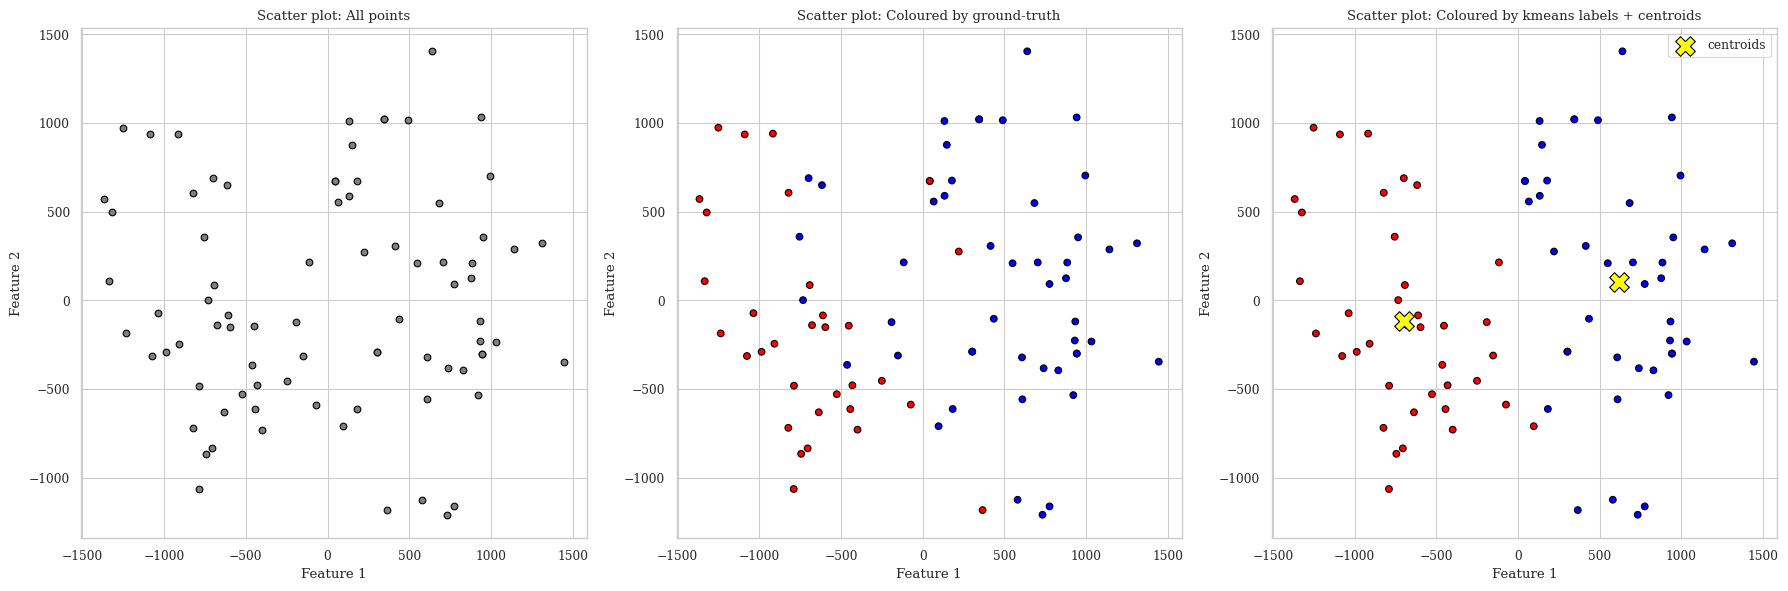

In [20]:
def k_means(testing_set):
    X = testing_set[0]
    labels = testing_set[1]
    kmeans = KMeans(n_clusters=2, n_init=10, verbose=1, random_state=42)

    pca = PCA(n_components=81) 
    # choose principle components (max is 81 for high explained variance)
    # for more meaningful clusters and better yield, also much easier to work with
    X_pca = pca.fit_transform(X)
    kmeans.fit(X_pca) # fit onto PCA

    mapping = {16: 0, 41: 1}
    newlabels = [mapping[lab] for lab in labels if lab in mapping]
    # convert 16 and 41 to 0s and 1s for referencing

    ct = pd.crosstab(newlabels, kmeans.labels_) # compare true values against kmeans values
    print('Crosstab (True vs KMeans):',ct)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c='gray', edgecolor='k') # plot all points as grey
    axes[0].set_title('Scatter plot: All points')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')

    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=newlabels, cmap='bwr', edgecolor='k') 
    # plot points showing true values as (0-1)
    axes[1].set_title('Scatter plot: Coloured by ground-truth')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')

    klabels = kmeans.labels_
    scatter = axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=klabels, cmap='bwr', edgecolor='k')
    # recolour by what the kmeans thinks the labels are

    centers = kmeans.cluster_centers_
    axes[2].scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, marker='X', edgecolor='k', label='centroids')
    # show cluster centres by what kmeans thinks true values are
    axes[2].set_title('Scatter plot: Coloured by kmeans labels + centroids')
    axes[2].set_xlabel('Feature 1')
    axes[2].set_ylabel('Feature 2')
    axes[2].legend()

    plt.tight_layout()
    plt.show()
    pass

k_means(test_set)

Here we have 13 false values and 68 true values, which overall I think is relatively good. However, there is a caveat that it was done using principle components, so there could possibly be some false positives and negative which is concerning. Either way, I believe this to be relatively negligible, and while a test could be done to review this I didn't have the time. Considering this, and accuracy of ~84% is pretty good. We can see quantitavely that the decision boundary could be drawn more towards -x, as it looks like the line is drawn too centrally leading to more incorrectly labeled values. It can be seen that overall my clustering algorithm recovered the two true classes.

Question 3 -
Each counter reports the number, 𝑋𝑖 , of radio-active particles detected in a fixed time interval of
t=10 seconds.
Radio-active particles can be assumed to be detected independently from each other at a constant rate of r=0.4 per second (1/second) at all counter locations and 𝐷(𝜃𝑖) depicts the probability distribution for the random variable 𝑋𝑖.
This is from the question and the base parameters for the experiment and future code

We know each counter is active for 10 seconds and detects 0.4 particles per sec, or 4 in total.
These praticels can be transmitted succesfully or unsuccesfully
^ According to BERNOULLI distributed random variables, Wi where Prob(Wi = 1) = a  ---- ie the chance of a succesful transmission is = a.
They all report to a tool that sums this as Y = nSUM(i=1)[Wi * Xi]

3.a - Assuming a = 1 (100% chance of transmission) simulate 1000 samples of Y. 
Need to choose a distribution to model this, here I'm choosing poisson as it is discrete and we know the total no. of success. From here a histogram is plotted on the resulting data.

<function matplotlib.pyplot.show(close=None, block=None)>

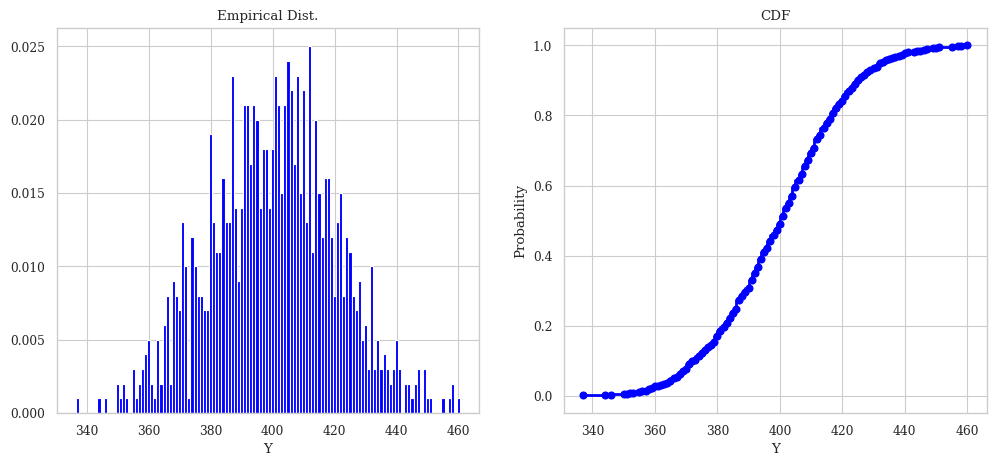

In [36]:
n_counters = 100
n_samples = 1000
Y = []
D = stats.poisson(mu = 4)
for i in range(n_samples):
    samples = D.rvs(size=(n_counters))  #mu = 4 as its the average no of particles (0.4*10)
    Yi = np.sum(samples)
    Y.append(Yi)

Y_values, totals = np.unique(Y, return_counts=True)
empirical_dist = totals / totals.sum()
cdf_values = np.cumsum(empirical_dist)

fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].bar(Y_values, empirical_dist, width=1,color='b')
ax[1].step(Y_values, cdf_values, 'b-o', linewidth=2)
plt.ylabel('Probability')
ax[0].set_xlabel('Y')
ax[1].set_xlabel('Y')
ax[0].set_title("Empirical Dist.")
ax[1].set_title("CDF")
plt.show

3.b - Same assumptions as a.

I interpreted this question as that the Poisson distr. cannot be changed, although looking back maybe it is asking to approx this as normal etc and not change the parameters. Either way I'm sticking to my original model and using pmf and cdf to show it is not the true cumulative distribution using cumsum. Overall, was confused by the working and the discussion form didn't help as the clarification about this question wasn't answered.

<function matplotlib.pyplot.show(close=None, block=None)>

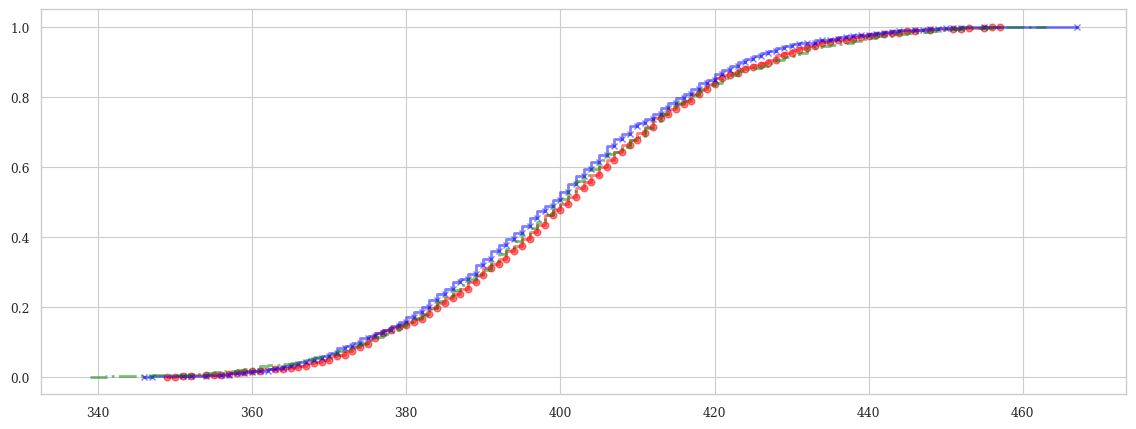

In [ ]:
Y1=[]
Y2=[]

for i in range(n_samples):
    samples = D.rvs(size=(n_counters))
    pmf = D.pmf(samples)
    Yi = np.sum(samples)
    Y1.append(Yi)
Y1_values, totals = np.unique(Y1, return_counts=True)
empirical_dist1 = totals / totals.sum()
cdf1_values = np.cumsum(empirical_dist1)

for i in range(n_samples):
    samples = D.rvs(size=(n_counters))
    cdf = D.cdf(samples)
    Yi = np.sum(samples)
    Y2.append(Yi)
Y2_values, totals = np.unique(Y2, return_counts=True)
empirical_dist2 = totals / totals.sum()
cdf2_values = np.cumsum(empirical_dist2)

print('True CDF in red, pmf in blue and cdf in green')
fig = plt.subplots(figsize=(14, 5))
plt.step(Y_values, cdf_values, 'r-o', linewidth=2, alpha = 0.5)
plt.step(Y1_values, cdf1_values, 'b-x', linewidth=2, alpha = 0.5)
plt.step(Y2_values, cdf2_values, 'g-.', linewidth=2, alpha = 0.5)
plt.show

3.c - Hypothesis testing

Test the hypothesis that the cumulative count across the network is: \
Larger than 400 detected particles in a 10 second interval              -----  (n > 400)\
At a significancelevel of 5%                                            -----  (p = 0.05)\
H0: E(Y) <= 400 \
H1: E(Y) > 400 \
so we do a t test, one tailed with p = 0.05 to see if there is more than 400 particles over a 10 second interval\
Computer simulated data (at least with numpy) is not truly random and is generated through code. That means it is not a real world observation, and as such doing a hypothesis test is a bit redundant as we are not observing something that we don't know things about, as in generated data we could theoretically find exactly how it was made. This makes hypothesis testing a bit pointless as we are designing error to test.

In [37]:
n = len(Y)
Y = np.array(Y)
observation = Y.mean()
alpha = 0.05
mu = 400
sigma = Y.std()

t_stat = (observation - mu)/(sigma / (n**0.5))
p_value = 1 - stats.t.cdf(t_stat, df=n-1)
print(f"P_value found = {p_value:.4g}")
h = int(p_value < alpha)
print (f"Hypothesis: H{h}")
if h == 0:
    print("There is not enough evidence to suggest that the cumulative count across the network is larger than 400")
else:
    print("There is evidence to suggest that the cumulative count across the network is larger than 400")

P_value found = 0.388
Hypothesis: H0
There is not enough evidence to suggest that the cumulative count across the network is larger than 400


3.d - Discuss how your answer to (b) would change if alpha = 0.5 and r remains the same for all sensors 

This means that each particle would have a 50% chance of not being detected, rather than 0%. This means that values will be given as 0 as well as the output, meaning the mean would decrease and the CDF will change. The normal distribution will get thinner, with less tail end due to smaller number of transmissions, and the CDF should get steeper. The CDF also should shift left as that total particles average should be closer to 200. The other models should be relatively similar with the same changes.

3.e - Two counter systems

Let alpha = 0.5 \
Consider the situation where 50 counters detect at a constant rate of r = 0.4 per second, and 50 detect at a constant rate of r=1 per second. \
I interpreted this as simulated 1000 seconds of these 10 second clusters, to find the empirical normal and CDF. Using the binomial distribution to randomly selected 50% of datapoints to remove. This means that there would be a peak at 4 and 10, rather than 2 and 5, as the average would still be the same.

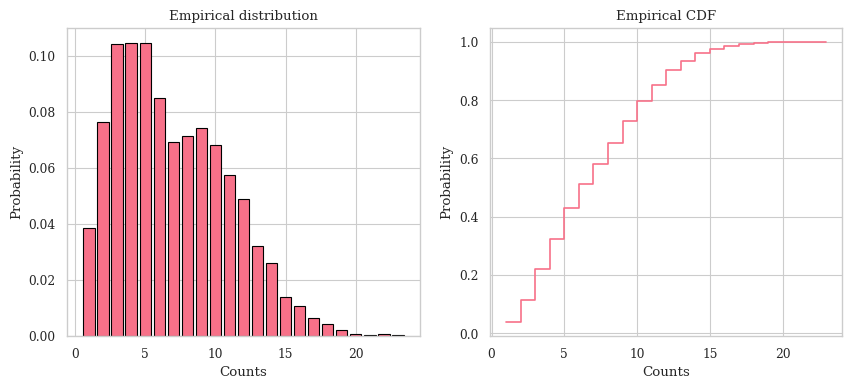

In [41]:
seconds = 1000
interval = 10
alpha = 0.5
no_counters = 50
n_intervals = int(seconds/interval)
mu0 = 0.4 * interval
mu1 = 1 * interval
n_intervals = int(seconds/interval)

D0 = stats.poisson.rvs(mu = mu0, size=(n_intervals, no_counters))
D1 = stats.poisson.rvs(mu = mu1, size=(n_intervals, no_counters))
W0 = np.random.binomial(n=1, p=alpha, size=(n_intervals, no_counters))
W1 = np.random.binomial(n=1, p=alpha, size=(n_intervals, no_counters))
C0 = W0 * D0
C1 = W1 * D1
total_counts = np.concatenate((C0,C1), axis=0)

ravel = total_counts.ravel()
filtered_ravel = []
for point in ravel:
    if point != 0:
        filtered_ravel.append(point)

values, counts = np.unique(filtered_ravel, return_counts=True)
pmf = counts / counts.sum()
cdf = np.cumsum(pmf)


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(values, pmf, width=0.8, edgecolor='black')
axes[0].set_xlabel('Counts')
axes[0].set_ylabel('Probability')
axes[0].set_title('Empirical distribution')
axes[1].step(values, cdf, where='post')
axes[1].set_xlabel('Counts')
axes[1].set_ylabel('Probability')
axes[1].set_title('Empirical CDF')
plt.show()

3.f - Fit a bimodal probability distribution, based on two Normal distributions, to the data you simulated in (e) 


From first principles using maximum likelihood estimation. Meaning to derive the L, logL and MLE\
Have two peaks at 4 and 10, so those would be the two normals, with a higher weight for 4 is what I intially thought\
Model is: \
P(X = 4) = p, P(X = 10) = (1-p)\
Bimodal model = X ~ (p)N(mean1, var1) + (1-p)N(mean2, var2)\
However we can see at the end that it is the second normal just has a larger variance, weighting is similar.\
I derived the full mean MLE and var MLE, as well as the p values, and set up an iteration to converge them, as the original functions had no solution that I could find. Some of the der. is in the code with the steps I took to find it, however the full der. was done by hand on my iPad, with reference to the worksheet and how it does it. I don't know if this is what was meant by from first principles but I assume so. \
Overall I believe my model fits very very well, with the bimodal distribution perfectly matching my simulated data, for most bin sizes.

p value 0.38283708324713456, means 1 and 2: (3.603451800701979, 9.120214963426498) variances 1 and 2: (2.323303309085629, 12.098848614963224)


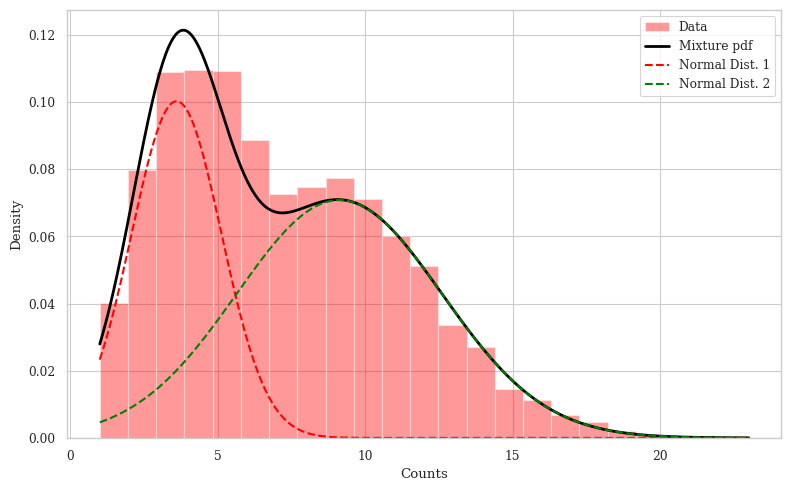

In [49]:
'''
Likelihood (L) = ProductSum of: Px[(p)(x ; mean1, var1)] + Px[(1-p)(x; mean2, var2)]
L = ProductSum of: (p)(1/sqrt(2 * pi * var1)) * exp(-[x - mean1]^2/[2 * var1]) + (1-p)...

log(L) = Sum: log{ (p)(1/sqrt(2 * pi * var1)) * exp(-[x - mean1]^2/[2 * var1]) + (1-p)... }
set m = (p)(1/sqrt(2 * pi * var1)) * exp(-[x - mean1]^2/[2 * var1])
set n = (1 - p)(1/sqrt(2 * pi * var2)) * exp(-[x - mean2]^2/[2 * var2])
log(L) = Sum: log(m+n)

meanMLE:
Differentiate with respect to mean1:
Using Chain Rule --> dL/dmean1 = Sum: 1/(m+n)(dm/dmean1) ----> as dn/dmean1 = 0!
As dm/dmean1 = differentiate m with respect to mean1 = m * d/dmean1 = m * (x - mean1)/var1
dL/dmean1 = Sum: 1/(m+n) * m([x-mean1]/var1) = Sum: m/(m+n) * (x - mean1)/var1 = 0
therefore:
dL/dmean2 = Sum: n/(m+n) * (x - mean2)/var2 = 0
---- Set m/(m+n) as A ----
mean1MLE = [SumAx] / [SumA]
mean2MLE = [Sum(1-A)x] / [Sum(1-A)]

varMLE:
Similar proccess as meanMLE:
dL/dvar1 = Sum: A[-1/(2var1) + (x-mean1)^2/(2var)^2]
...
var1MLE = [SumA(x - mean1)^2] / [SumA]
var2MLE = [Sum(1-A)(x - mean1)^2] / [Sum(1-A)]
'''

x = np.asarray(filtered_ravel, dtype=float)
len = x.shape[0]
p = alpha
mean1 = 4.0
mean2 = 10.0
var1 = var2 = np.var(x)
iterations = 100

for i in range(iterations):
    m = p * stats.norm.pdf(x, loc=mean1, scale=np.sqrt(var1))
    n = (1-p) * stats.norm.pdf(x, loc=mean2, scale=np.sqrt(var2))

    mn = m + n
    A = m/mn
    B = 1 - A
    sumA = A.sum()
    sumB = B.sum()

    new_mean1 = float((A * x).sum() / sumA)
    new_mean2 = float((B * x).sum() / sumB)
    new_var1 = float((A * (x - mean1)**2).sum() / sumA)
    new_var2 = float((B * (x - mean2)**2).sum() / sumB)
    new_p = float(sumA / len)

    if np.allclose(
        np.array([p, mean1, mean2, var1, var2], dtype=float),
        np.array([new_p, new_mean1, new_mean2, new_var1, new_var2], dtype=float),
        rtol=1e-6, atol=1e-6):
        break

    p, mean1, mean2, var1, var2 = new_p, new_mean1, new_mean2, new_var1, new_var2

print(f"p value {p}, means 1 and 2: {mean1, mean2} variances 1 and 2: {var1, var2}")

plt.figure(figsize=(8,5))
count, bins, i = plt.hist(x, bins=23, density=True, alpha=0.4, color="red", label="Data")

xs = np.linspace(x.min(), x.max(), 1000)
norm1 = p * stats.norm.pdf(xs, loc=mean1, scale=np.sqrt(var1))
norm2 = (1 - p) * stats.norm.pdf(xs, loc=mean2, scale=np.sqrt(var2))
mix   = norm1 + norm2

plt.plot(xs, mix, "black", lw=2, label="Mixture pdf")
plt.plot(xs, norm1, "r--", lw=1.5, label="Normal Dist. 1")
plt.plot(xs, norm2, "g--", lw=1.5, label="Normal Dist. 2")

plt.xlabel("Counts")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

QUESTION 4\
Multiple Linear Regression Model\
Y = B0 + B1X1 + B2X2 + E\
E = normal dist\
Investigate each X on the output Y\
Predict Y based on given X\

AIC and BIC for full Model, X1 and X2 respectively =
[91.0200089838658, 94.6766364584704]
[89.56875959566486, 92.00651124540126]
[103.03588538227235, 105.47363703200875]
 
beta1 = 0.9624741021448007 with p value: 0.0005124135994788797
beta2 = -2.646272131150817 with p value: 0.4920350146215544
Found p value above confidence interval


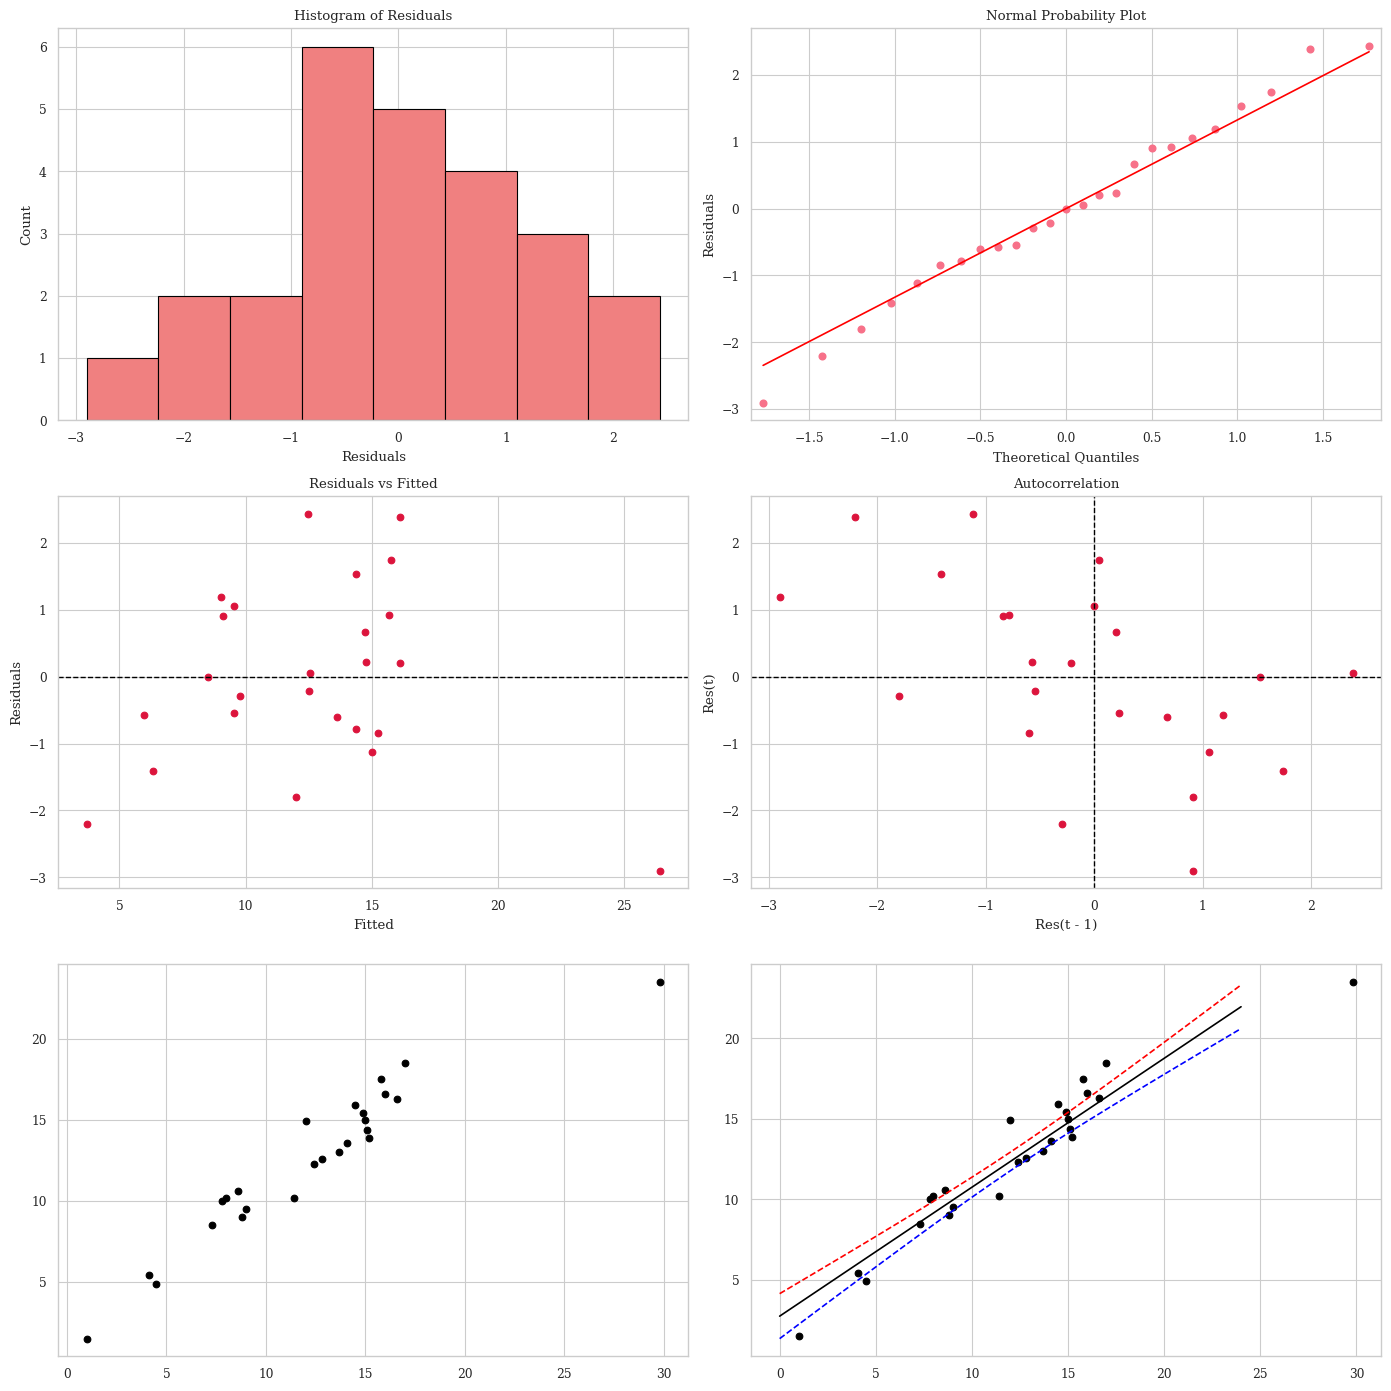

In [ ]:
'''
4.a - gas vs ingredients
'''
A = pd.read_csv("burning_experiment.txt", sep='\\s+')
X1 = A["ingredient1"].to_numpy()
X2 = A["ingredient2"].to_numpy()
Y = A["gas"].to_numpy()


X1_model = smf.ols("gas ~ ingredient1", A).fit()
X2_model = smf.ols("gas ~ ingredient2", A).fit()
linear_model = smf.ols("gas ~ ingredient1 + ingredient2", A).fit()

print("AIC and BIC for full Model, X1 and X2 respectively =")
print([linear_model.aic, linear_model.bic])
print([X1_model.aic, X1_model.bic])
print([X2_model.aic, X2_model.bic])
#We can see AIC and BIC improve if ingredient 2 is removed
print(" ")

conf_int = 0.05
confidence = linear_model.conf_int(alpha=conf_int)
beta1_hat = linear_model.params["ingredient1"]
beta2_hat = linear_model.params["ingredient2"]
p_beta1 = linear_model.pvalues["ingredient1"]
p_beta2 = linear_model.pvalues["ingredient2"]

print('beta1 =', beta1_hat, 'with p value:',p_beta1)
print('beta2 =', beta2_hat, 'with p value:',p_beta2)
if (p_beta1 > conf_int) or (p_beta2 > conf_int):
    print('Found p value above confidence interval')
# We can that B1 = 0.9625 as it meets the confidence interval, whereas B2 doesn't, so it assume co-linearity.


resid = linear_model.resid
fitted = linear_model.fittedvalues
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

axes[0, 0].hist(resid, bins=8, color="lightcoral", edgecolor="r")
axes[0, 0].set_title("Histogram of Residuals")
axes[0, 0].set_xlabel("Residuals")
axes[0, 0].set_ylabel("Count")
sm.qqplot(resid, line="s", ax=axes[0, 1])
axes[0, 1].set_title("Normal Probability Plot")
axes[0, 1].set_ylabel("Residuals")

axes[1, 0].scatter(fitted, resid, color="crimson")
axes[1, 0].axhline(0, color="r", linestyle="--", linewidth=1)
axes[1, 0].set_title("Residuals vs Fitted")
axes[1, 0].set_xlabel("Fitted")
axes[1, 0].set_ylabel("Residuals")

axes[1, 1].scatter(resid[:-1], resid[1:], color="crimson")
axes[1, 1].axhline(0, color="r", linestyle="--", linewidth=1)
axes[1, 1].axvline(0, color="r", linestyle="--", linewidth=1)
axes[1, 1].set_title("Autocorrelation")
axes[1, 1].set_xlabel("Res(t - 1)")
axes[1, 1].set_ylabel("Res(t)")


def predict_gas_output(ingred1):
    # ingredient 2 can be discounted here as it offers very little in terms of predictive gas
    new = pd.DataFrame({"ingredient1": np.atleast_1d(ingred1)})
    pred = X1_model.get_prediction(new)
    pred_frame = pred.summary_frame(alpha=0.05)  # 95% intervals
    mean = pred_frame['mean'].loc[0]
    upper = pred_frame['mean_ci_upper'].loc[0]
    lower = pred_frame['mean_ci_lower'].loc[0]
    return mean, upper, lower

pred_mean_gas = []
pred_lower_gas = []
pred_upper_gas = []
ing1 = []
for i in range(25):
    pred_mean = predict_gas_output(i)[0]
    pred_lower = predict_gas_output(i)[1]
    pred_upper = predict_gas_output(i)[2]
    ing1.append(int(i))
    pred_mean_gas.append(pred_mean)
    pred_upper_gas.append(pred_upper)
    pred_lower_gas.append(pred_lower)

pred_mean_gas = np.asarray(pred_mean_gas).flatten()
pred_lower_gas = np.asarray(pred_lower_gas).flatten()
pred_upper_gas = np.asarray(pred_upper_gas).flatten()

X = A["ingredient1"].values
gas = A["gas"].values

axes[2, 0].scatter(X, gas, color="k", label="Observed gas")
axes[2, 1].scatter(X, gas, color="k", label="Observed gas")
axes[2, 1].plot(ing1, pred_mean_gas,
        color="black", label="Predicted mean gas")
axes[2, 1].plot(ing1, pred_upper_gas,
        color="b", linestyle="--",label="Predicted mean gas")
axes[2, 1].plot(ing1, pred_lower_gas,
        color="r", linestyle="--",label="Predicted mean gas")

plt.tight_layout()
plt.show()

The residuals v fitted panel looks like a random cloud around zero with no obvious curve or funnel, so linearity and constant variance look okay overall, and the normal plot prob. fits nicely. We can also see that in the bottom right the mean, upper and lower fits nicely onto the plot, meaning that X1 is the major contributer to gas emissions, and that X2's affect is negligible.\
To improve the experiment, I would have data that analyses the direct affect of X2 on gas, while keeping X1 constant.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/generalized_lin

                 Generalized Linear Model Regression Results                  
Dep. Variable:                recip_y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1996
Model Family:                   Gamma   Df Model:                            3
Link Function:          inverse_power   Scale:                      0.00019830
Method:                          IRLS   Log-Likelihood:                 10136.
Date:                Tue, 09 Dec 2025   Deviance:                      0.40636
Time:                        12:45:00   Pearson chi2:                    0.396
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3734      0.006    421.862      0.0

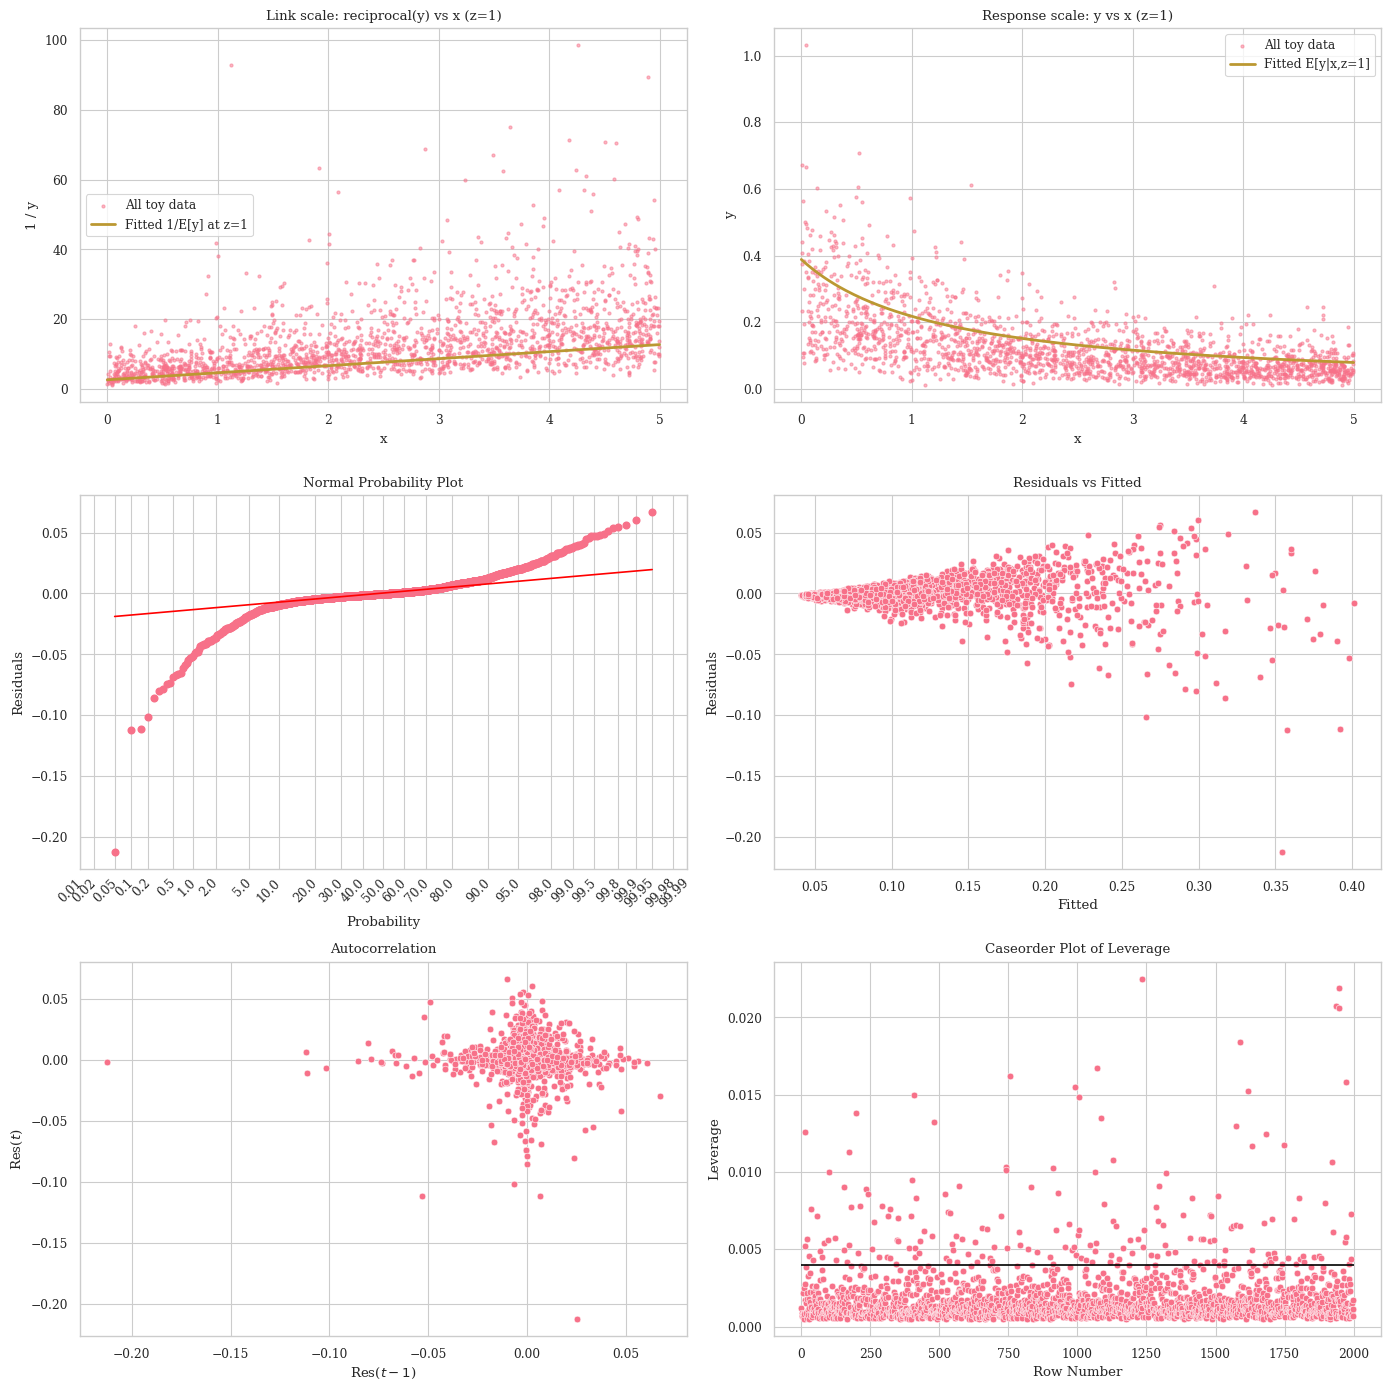

In [53]:
'''
B) i) GLM and link func.
'''
RANDOM_SEED = np.random.seed(0)

n = 2000
noise = 5.0
z1 = 1.0
x = np.random.uniform(0, 5, n)
z = np.random.uniform(0, 5, n)
grid = np.linspace(0, 5, 200)

beta_0, beta_1, beta_2, interaction = 2.0, 1.5, 0.6, 0.5
mu = beta_0 + beta_1 * x + beta_2 * z + interaction * x * z
expect_y  = 1.0 / mu
scale = expect_y / noise
y = np.random.gamma(shape=noise, scale=scale, size=n)
recip_y = 1/(y+mu)
stack = np.column_stack([y, x, z])
data = pd.DataFrame(stack, columns=["y", "x", "z"])
data['x_z'] = data['x'] * data['z']
family = sm.families.Gamma(sm.families.links.inverse_power())
fit = smf.glm("y ~ x * z", data=data, family=family).fit()
fit2 = smf.glm("recip_y ~ x + z + x_z", data=data, family=family).fit()

print(fit2.summary())

z_col = np.full_like(grid, z1) 
stack = np.column_stack([grid, z_col])
z1_grid = pd.DataFrame(stack, columns=["x", "z"])
l_pred_hat = fit.predict(z1_grid, linear=True)
exp_y_hat  = 1.0 / l_pred_hat

fig, axs = plt.subplots(3, 2, figsize=(14, 14))
axs[0,0].scatter(x, 1.0 / y, s=5, alpha=0.5, label="All toy data")
axs[0,0].plot(grid, l_pred_hat, color="C1", lw=2, label="Fitted 1/E[y] at z=1")
axs[0,0].set_xlabel("x")
axs[0,0].set_ylabel("1 / y")
axs[0,0].set_title("Link scale: reciprocal(y) vs x (z=1)")
axs[0,0].legend()

axs[0,1].scatter(x, y, s=5, alpha=0.5, label="All toy data")
axs[0,1].plot(grid, exp_y_hat, color="C1", lw=2, label="Fitted E[y|x,z=1]")
axs[0,1].set_xlabel("x")
axs[0,1].set_ylabel("y")
axs[0,1].set_title("Response scale: y vs x (z=1)")
axs[0,1].legend()

residplot(fit2, "probability", axs[1, 0], fit2.resid_deviance)

# RESIDUALS VERSUS FITTED VALUES (check for homoscedasticity)
residplot(fit2, "fitted", axs[1, 1], fit2.resid_deviance)

# AUTO-CORRELATION (via lagged residuals)
residplot(fit2, "lagged", axs[2, 0], fit2.resid_deviance)

# LEVERAGE
diagnosticplot(fit2, "leverage", axs[2, 1])

plt.tight_layout()
plt.show()

The normal probability plot is distinctly curved rather than roughly straight, which shows that the residuals are not well described by a normal distribution although a decent fit, the fan shape in the res. vs fitted. show a fan, which is a sign of non‑constant variance, and there are a few outliers in the autocorrelation. However, most points lie under the line in the caseorder meaning that we could say that the model is mostly correct, with a few outliers. To improve the analysis, it would help use a model that allows for mean–variance dependence for further checks.

Residual Std Error (cubic): 0.18525384591919583
Residual Std Error (linear): 0.2376315755796948
R^2 Cubic 0.811342204306349
R^2 Linear 0.6895807929282584
Cubic R^2 is greater, and RSE is lower


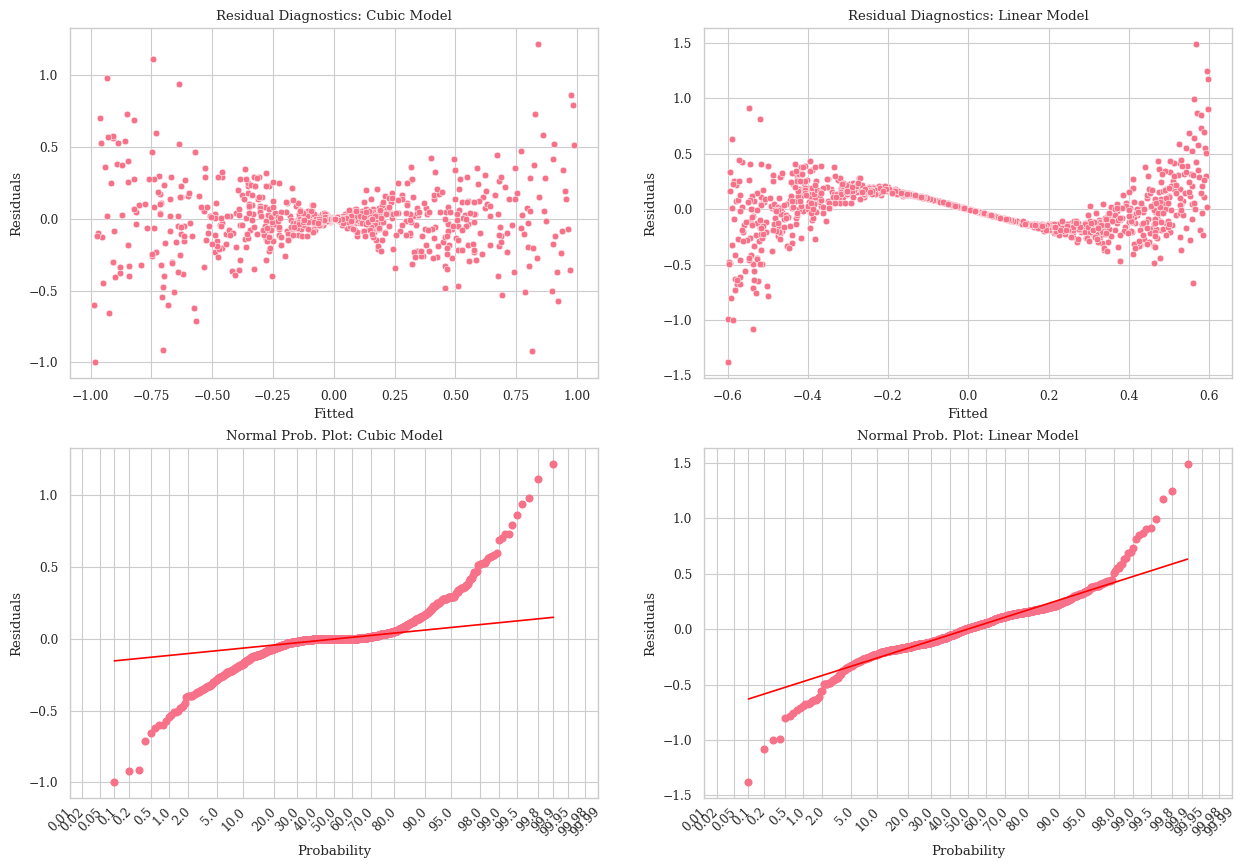

In [54]:
n = 1000
x = np.random.uniform(-1,1,n) #from example image
sigma = 0.5                     # constant noise level
noise = np.random.normal(1, sigma, n)
y = ((x)**3) * noise

data = pd.DataFrame({"x": x, "y": y, "x_3": x**3, "x_2": x**2})
fit_lin = smf.ols("y ~ x", data).fit()
fit_cubic = smf.ols("y ~ x_3", data).fit()


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

residplot(fit_cubic, "fitted", axs[0,0])
residplot(fit_lin, "fitted", axs[0,1])
residplot(fit_cubic, "probability", axs[1, 0])
residplot(fit_lin, "probability", axs[1, 1])
axs[0, 0].set_title("Residual Diagnostics: Cubic Model")
axs[0, 1].set_title("Residual Diagnostics: Linear Model")
axs[1, 0].set_title("Normal Prob. Plot: Cubic Model")
axs[1, 1].set_title("Normal Prob. Plot: Linear Model")

r2_cubic = fit_cubic.rsquared
r2_lin = fit_lin.rsquared
rse_cubic = np.sqrt(fit_cubic.mse_resid)
rse_lin   = np.sqrt(fit_lin.mse_resid)


print("Residual Std Error (cubic):", rse_cubic)
print("Residual Std Error (linear):", rse_lin)
print('R^2 Cubic', r2_cubic)
print('R^2 Linear', r2_lin)
print('Cubic R^2 is greater, and RSE is lower')

We can see that the cubic model fits the simulated data better, as it's residual vs fitted is a lot more spread, whereas the linear model is very converged. This is backed up by the R squared values and the std error, as well as the line being more straight on the normal prob. plot. This suggests the predictor is more positively cubic than negatively linear.

In [ ]:
'''
'''

permutations = 500
n_A = 20
n_B = 40
p_A_obs = 0.8           # observed proportion of heads A
p_B_obs = 0.6           # observed proportion of heads B (p>0.1)
heads_A = int(n_A * p_A_obs)
heads_B = int(n_B * p_B_obs)

p_A_list = []
p_B_list = []
for i in range(permutations):
    A_dist = np.random.binomial(n=n_A, p=p_A_obs)
    B_dist = np.random.binomial(n=n_B, p=p_B_obs)
    y_A = int(A_dist)
    y_B = int(B_dist)
    test_A = binomtest(y_A, n_A, p=p_A_obs, alternative="two-sided")
    test_B = binomtest(y_B, n_B, p=p_B_obs, alternative="two-sided")
    p_A_list.append(test_A.pvalue)
    p_B_list.append(test_B.pvalue)

print("A: p-value vs experimental coin:", np.mean(p_A_list))
print("B: p-value vs experimental coin:", np.mean(p_B_list))

A: p-value vs experimental coin: 0.575088904413997
B: p-value vs experimental coin: 0.5397099849288265


I wasn't entirely sure about this part or what it was asking to test, so I found p-values of the simualted vs observed coins to see if the data matched. With such high p-values, you could conclude that the coins aren't proven to be at p(heads) = 0.6 and 0.8 respectively.